Import

In [1]:
%%capture
!git clone https://github.com/AndreasHammerKU/CardiacCTAnalysis.git
%cd CardiacCTAnalysis

Imports from Github Repository

In [2]:
%%capture
!pip install dash
import numpy as np

# Custom Imports
import utils.logger as logs
from baseline.BaseEnvironment import MedicalImageEnvironment
from baseline.BaseDataLoader import DataLoader
from baseline.BaseAgent import DQNAgent
from utils.parser import Experiment, ExperimentConfig

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

dataset_folder = '/content/drive/MyDrive/CardiacCTAnalysis/Data'

Hyperparameters

In [3]:
debug = False

# Colab not enough RAM
preload_images = False
logger = logs.setup_logger(debug)

dataLoader = DataLoader(dataset_folder)

In [18]:
def run_training(config):
  train_env = MedicalImageEnvironment(logger=logger,
                                dataLoader=dataLoader,
                                image_list=['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30'],
                                agents=config.agents,
                                preload_images=preload_images,
                                n_sample_points=config.n_sample_points,
                                use_unet=config.use_unet,
                                unet_init_features=config.unet_init_features)
  eval_env = MedicalImageEnvironment(logger=logger,
                                task="eval",
                                dataLoader=dataLoader,
                                image_list=['n31', 'n32', 'n33', 'n34', 'n35', 'n36', 'n37', 'n38', 'n39', 'n40'],
                                agents=config.agents,
                                n_sample_points=config.n_sample_points,
                                use_unet=config.use_unet,
                                unet_init_features=config.unet_init_features)
  agent = DQNAgent(train_environment=train_env,
                   eval_environment=eval_env,
                   task="train",
                   logger=logger,
                   dataLoader=dataLoader,
                   state_dim=train_env.state_size,
                   action_dim=train_env.n_actions,
                   attention=config.attention,
                   model_type=config.model_type,
                   agents=config.agents,
                   max_steps=config.max_steps,
                   episodes=config.episodes,
                   decay=config.decay,
                   image_interval=config.image_interval,
                   evaluation_steps=config.evaluation_steps,
                   evaluation_interval=config.evaluation_interval,
                   experiment=config.experiment,
                   use_unet=config.use_unet)

  agent.train_dqn()
  train_env.visualize_current_state()
  eval_env.visualize_current_state()

def run_test(config):
  test_env = MedicalImageEnvironment(logger=logger,
                                task="test",
                                dataLoader=dataLoader,
                                image_list=['n41', 'n42', 'n43', 'n44', 'n45', 'n46', 'n47', 'n48', 'n49', 'n50'],
                                agents=config.agents,
                                n_sample_points=config.n_sample_points,
                                use_unet=config.use_unet,
                                unet_init_features=config.unet_init_features)
  agent = DQNAgent(test_environment=test_env,
                   task="test",
                   logger=logger,
                   dataLoader=dataLoader,
                   state_dim=test_env.state_size,
                   action_dim=test_env.n_actions,
                   attention=config.attention,
                   agents=config.agents,
                   model_name=f"{config.model_type}-{config.experiment.name}",
                   model_type=config.model_type,
                   max_steps=config.max_steps,
                   episodes=config.episodes,
                   evaluation_steps=config.evaluation_steps,
                   evaluation_interval=config.evaluation_interval,
                   experiment=config.experiment,
                   use_unet=config.use_unet
                   )

  agent.test_dqn()
  test_env.visualize_current_state()

Experiment 1: Network 3D - work alone

In [16]:
config = ExperimentConfig(model_type="Network3D",
                          max_steps=300,
                          image_interval=2,
                          episodes=40,
                          agents=6,
                          evaluation_steps=40,
                          evaluation_interval=10,
                          decay=100, # EPSILON = MIN_EPS - (MAX_EPS - MIN_EPS) * e^(-1 * current_step / decay)
                          attention=False,
                          experiment=Experiment.WORK_ALONE,
                          use_unet=True,
                          unet_init_features=16,
                          n_sample_points=5
                          )

INFO:Logger:Episode 1: Total Reward = 3.34 | Final Avg Distance 25.41 | Distances in mm [10.42  5.83  3.92  4.17  3.5   7.93] | Avg Closest Point = 8.89 | Avg Furthest Point = 39.86
INFO:Logger:Episode 2: Total Reward = 23.89 | Final Avg Distance 4.85 | Distances in mm [3.04 0.54 1.93 0.44 0.37 0.  ] | Avg Closest Point = 0.93 | Avg Furthest Point = 30.11
INFO:Logger:Episode 3: Total Reward = 20.23 | Final Avg Distance 7.43 | Distances in mm [0.94 1.08 1.04 1.26 2.19 0.86] | Avg Closest Point = 2.98 | Avg Furthest Point = 28.17
INFO:Logger:Episode 4: Total Reward = 24.84 | Final Avg Distance 2.82 | Distances in mm [0.76 0.22 0.22 0.22 0.86 0.21] | Avg Closest Point = 0.71 | Avg Furthest Point = 29.57
INFO:Logger:Episode 5: Total Reward = 18.90 | Final Avg Distance 2.72 | Distances in mm [0.4  0.4  0.93 0.13 0.66 0.53] | Avg Closest Point = 0.90 | Avg Furthest Point = 22.81
INFO:Logger:Episode 6: Total Reward = 20.00 | Final Avg Distance 1.62 | Distances in mm [0.4  0.13 0.4  0.4  0.66 

[1.2130133  2.7505796  2.1014738  1.9172854  1.4961914  2.2605274
 0.98603183 3.8866417  1.9083906  0.8222088  1.8113344  2.6381838
 1.0243136  1.72575    0.36579868 2.491762   1.8332471  1.5277702
 1.0071708  0.7777412  1.6042039  1.5798432  3.2571292  2.4692054
 3.1800506  2.394318   1.5962121  5.733165   4.80101    2.9181397
 1.2911223  1.8332471  2.263621   4.363677   5.9131007  2.3281965
 1.9684551  1.6534388  1.1368356  2.032384   4.6324143  2.8243032
 1.6310127  0.97108006 0.74345505 1.4626781  3.0828645  2.0741467
 2.675821   2.776358   3.1746378  0.7435844  3.3204155  0.8433477
 3.0771942  1.2265469  2.8273997  2.1646311  3.0512867  1.5235167 ]


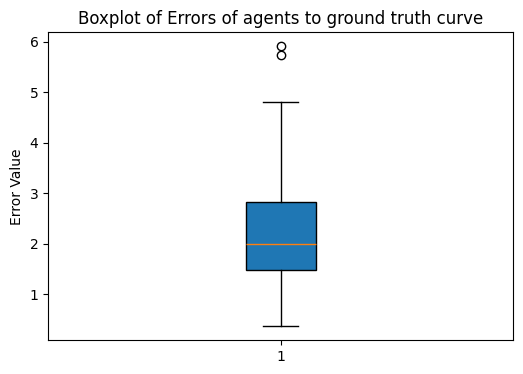

[1.2241644  2.7758653  2.1207924  1.9349109  1.5099458  2.2813082
 0.99509627 3.9223711  1.9259342  0.8297672  1.8279858  2.6624362
 1.0337299  1.7416146  0.36916143 2.5146682  1.8500998  1.5418148
 1.0164295  0.78489083 1.6189511  1.5943664  3.2870717  2.4919045
 3.2092843  2.416329   1.6108859  5.785869   4.845145   2.9449658
 1.3029914  1.8500998  2.2844303  4.403792   5.967459   2.3495994
 1.9865508  1.6686387  1.1472864  2.0510674  4.6749997  2.8502667
 1.6460063  0.98000705 0.75028956 1.4761243  3.1112049  2.093214
 2.7004197  2.8018806  3.2038217  0.7504201  3.3509398  0.8511005
 3.1054823  1.2378224  2.8533916  2.1845305  3.079337   1.5375221 ]


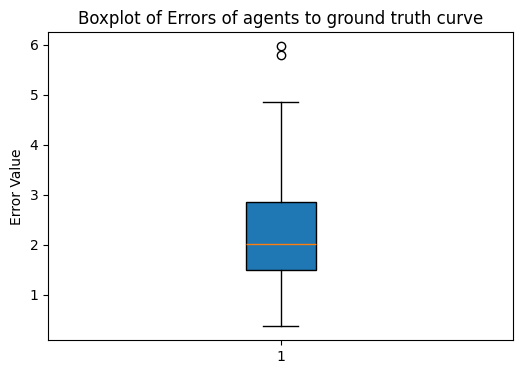

[1.8380865 4.16797   3.184376  2.9052744 2.267188  3.4253912 1.49414
 5.889452  2.891796  1.245898  2.744726  3.997656  1.5521486 2.6150396
 0.554297  3.775782  2.7779305 2.3150396 1.526172  1.178516  2.43086
 2.393946  4.935548  3.741602  4.81875   3.628125  2.41875   8.6875
 7.275     4.421875  1.9564456 2.7779305 3.430079  6.6123066 8.960158
 3.5279305 2.982812  2.505466  1.722654  3.079684  7.019526  4.279684
 2.4714835 1.4714836 1.126562  2.2164052 4.6714835 3.142967  4.054688
 4.207032  4.810548  1.126758  5.031446  1.27793   4.662891  1.8585941
 4.284376  3.280079  4.6236334 2.308594 ]


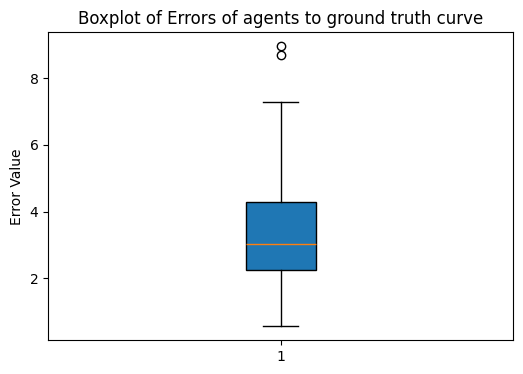

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.38
INFO:Logger:Average Furthest Distance Across Agents: 28.76
INFO:Logger:Episode 11: Total Reward = 20.15 | Final Avg Distance 3.31 | Distances in mm [0.47 0.93 0.62 0.47 0.82 0.35] | Avg Closest Point = 1.64 | Avg Furthest Point = 25.69
INFO:Logger:Episode 12: Total Reward = 21.52 | Final Avg Distance 1.94 | Distances in mm [0.49 0.22 0.35 0.22 0.62 0.13] | Avg Closest Point = 0.00 | Avg Furthest Point = 24.82
INFO:Logger:Episode 13: Total Reward = 24.50 | Final Avg Distance 3.45 | Distances in mm [1.2  0.54 0.   1.61 0.54 0.4 ] | Avg Closest Point = 2.31 | Avg Furthest Point = 29.39
INFO:Logger:Episode 14: Total Reward = 26.30 | Final Avg Distance 1.65 | Distances in mm [0.4  0.27 0.27 0.54 0.27 0.13] | Avg Closest Point = 0.33 | Avg Furthest Point = 29.13
INFO:Logger:Episode 15: Total Reward = 19.28 | Final Avg Distance 4.52 | Distances in mm [0.55 0.33 0.71 0.58 2.05 0.48] | Avg Close

[1.8897023  2.7505796  3.2017055  1.9172854  0.8884604  3.7567189
 0.98603183 1.450305   1.8750073  0.78882545 0.62500244 5.4720273
 0.86074823 1.794579   0.63260746 1.2609614  1.8332471  2.0613878
 1.1737008  0.80210197 1.0762577  0.6701154  1.5067608  0.7431977
 2.6521044  1.3343014  1.0662037  4.124579   3.468771   5.5661197
 3.2794275  4.363677   2.2980356  3.4944217  1.0672351  3.558997
 1.6988106  1.6534388  3.1919055  2.0607414  1.7910968  3.8915384
 1.1272986  1.4747941  0.9831961  2.7219632  3.9085522  2.723253
 1.042101   2.776358   2.6789148  1.438834   4.7109146  2.7264762
 1.6654282  0.598193   2.1646311  1.6654282  1.8549008  2.2810214 ]


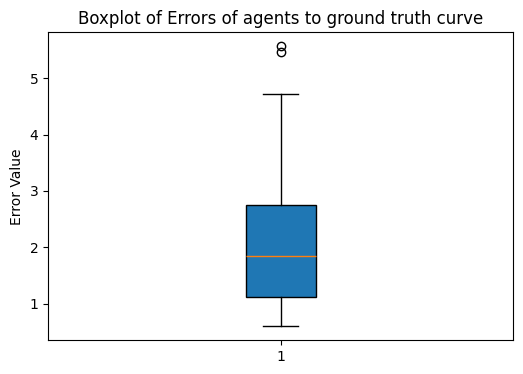

[1.9070741  2.7758653  3.2311385  1.9349109  0.8966279  3.7912538
 0.99509627 1.4636375  1.892244   0.796077   0.630748   5.5223308
 0.8686609  1.8110763  0.63842297 1.2725532  1.8500998  2.0803378
 1.1844904  0.80947554 1.0861516  0.6762757  1.5206124  0.7500298
 2.6764848  1.3465674  1.0760052  4.162496   3.500659   5.617288
 3.3095748  4.403792   2.3191612  3.5265453  1.0770462  3.5917144
 1.7144275  1.6686387  3.2212481  2.0796854  1.8075621  3.9273129
 1.1376617  1.4883517  0.99223447 2.746986   3.944483   2.7482877
 1.0516809  2.8018806  2.7035418  1.452061   4.7542214  2.7515402
 1.6807382  0.6036921  2.1845305  1.6807382  1.8719527  2.3019905 ]


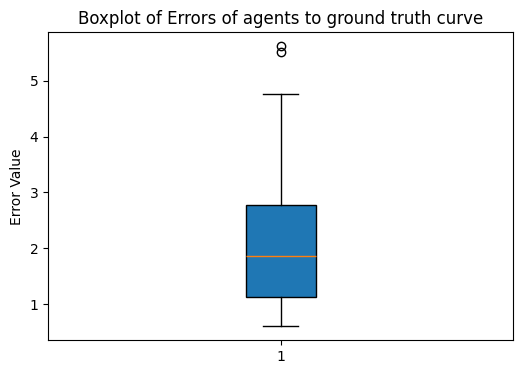

[2.8634775  4.16797    4.851564   2.9052744  1.3462895  5.6925793
 1.49414    2.1976562  2.8412101  1.195312   0.94707    8.291796
 1.304297   2.7193365  0.95859396 1.9107425  2.7779305  3.1236334
 1.778516   1.21543    1.63086    1.01543    2.283204   1.1261721
 4.01875    2.021875   1.615625   6.25       5.25625    8.434375
 4.9693365  6.6123066  3.4822276  5.2951183  1.617188   5.39297
 2.574218   2.505466   4.836714   3.122654   2.71406    5.896872
 1.7082026  2.2347646  1.489843   4.1246076  5.922653   4.126562
 1.579102   4.207032   4.059376   2.180274   7.138478   4.131446
 2.5236335  0.9064455  3.280079   2.5236335  2.8107426  3.4564457 ]


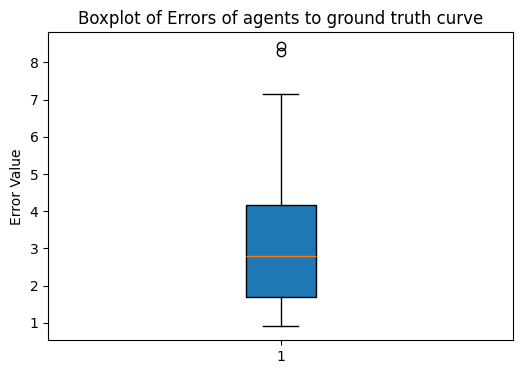

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 9.94
INFO:Logger:Average Furthest Distance Across Agents: 27.60
INFO:Logger:Episode 21: Total Reward = 2.62 | Final Avg Distance 25.41 | Distances in mm [8.59 4.37 0.39 4.71 6.02 1.42] | Avg Closest Point = 3.65 | Avg Furthest Point = 35.47
INFO:Logger:Episode 22: Total Reward = 22.57 | Final Avg Distance 5.45 | Distances in mm [0.2  0.43 0.2  0.36 2.7  0.3 ] | Avg Closest Point = 1.24 | Avg Furthest Point = 33.29
INFO:Logger:Episode 23: Total Reward = 23.90 | Final Avg Distance 2.61 | Distances in mm [0.4  0.27 1.07 0.41 0.27 0.82] | Avg Closest Point = 0.64 | Avg Furthest Point = 30.13
INFO:Logger:Episode 24: Total Reward = 25.13 | Final Avg Distance 1.37 | Distances in mm [0.14 0.27 0.27 0.13 0.27 0.26] | Avg Closest Point = 0.17 | Avg Furthest Point = 28.37
INFO:Logger:Episode 25: Total Reward = 23.31 | Final Avg Distance 3.01 | Distances in mm [0.37 1.02 0.25 0.75 0.5  0.5 ] | Avg Closes

[2.2304955  2.4974334  3.3996854  5.5173993  0.6628974  4.2403255
 1.8447177  1.1195652  2.3998597  0.78882545 1.1529486  1.2818414
 2.2980356  1.7601645  1.0973961  2.6294198  1.5664382  1.3986194
 1.1980616  1.0173535  1.9616247  0.6701154  1.1249793  2.13215
 1.872559   0.5361953  1.3384259  4.124579   2.9284513  1.332239
 3.1417696  3.4944217  2.4012792  0.7660119  1.2652149  1.3986194
 1.1708645  1.4008087  2.9279325  2.032384   2.0493984  1.5214523
 2.6505568  5.1314893  0.73133904 6.751676   2.6492672  6.246672
 1.3382972  2.776358   1.8854487  2.0826552  5.008658   1.3874055
 2.6124055  0.8650018  3.4557536  3.558997   1.8893152  2.323943  ]


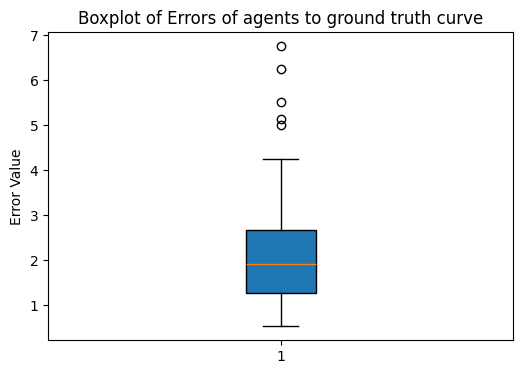

[2.2510002  2.520392   3.4309382  5.56812    0.6689913  4.2793064
 1.861676   1.1298572  2.4219213  0.796077   1.1635475  1.2936251
 2.3191612  1.7763455  1.1074843  2.6535916  1.5808383  1.4114767
 1.2090752  1.0267059  1.9796576  0.6762757  1.135321   2.1517506
 1.8897731  0.54112446 1.35073    4.162496   2.955372   1.3444861
 3.1706514  3.5265453  2.4233537  0.7730537  1.2768459  1.4114767
 1.181628   1.4136862  2.9548485  2.0510674  2.0682383  1.5354388
 2.6749232  5.1786623  0.73806214 6.813743   2.6736214  6.3040967
 1.3506     2.8018806  1.9027814  2.1018007  5.054702   1.4001597
 2.636421   0.87295365 3.487522   3.5917144  1.9066836  2.3453066 ]


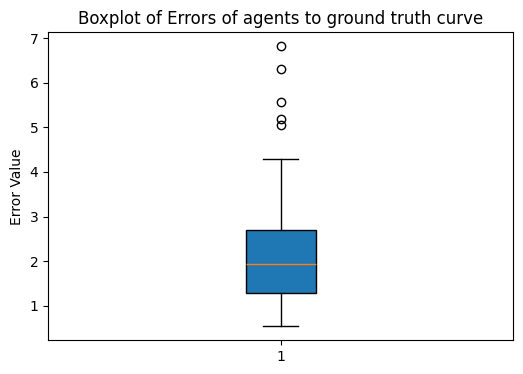

[ 3.3798835  3.784376   5.151564   8.360549   1.0044925  6.425391
  2.795312   1.6964841  3.636522   1.195312   1.7470701  1.9423821
  3.4822276  2.667188   1.662891   3.984376   2.3736334  2.1193366
  1.81543    1.541602   2.972462   1.01543    1.704688   3.23086
  2.8375     0.8125     2.028125   6.25       4.4375     2.01875
  4.7607427  5.2951183  3.6386728  1.1607425  1.9171879  2.1193366
  1.774218   2.122654   4.436714   3.079684   3.105466   2.305466
  4.016405   7.7757773  1.1082026 10.230856   4.0144506  9.46562
  2.02793    4.207032   2.857032   3.15586    7.58965    2.102344
  3.958594   1.3107425  5.2365246  5.39297    2.862891   3.521485 ]


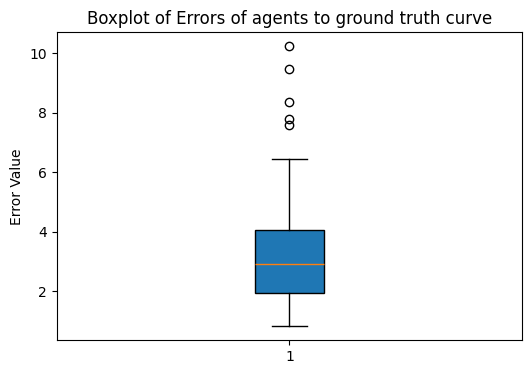

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.46
INFO:Logger:Average Furthest Distance Across Agents: 28.36
INFO:Logger:Episode 31: Total Reward = 25.11 | Final Avg Distance 2.55 | Distances in mm [0.31 0.64 0.2  0.22 0.43 0.43] | Avg Closest Point = 0.80 | Avg Furthest Point = 30.24
INFO:Logger:Episode 32: Total Reward = 26.43 | Final Avg Distance 1.23 | Distances in mm [0.32 0.22 0.22 0.21 0.22 0.  ] | Avg Closest Point = 0.00 | Avg Furthest Point = 28.83
INFO:Logger:Episode 33: Total Reward = 24.46 | Final Avg Distance 5.20 | Distances in mm [0.4  1.03 0.63 0.5  1.29 1.26] | Avg Closest Point = 2.83 | Avg Furthest Point = 30.43
INFO:Logger:Episode 34: Total Reward = 26.38 | Final Avg Distance 3.28 | Distances in mm [0.13 0.23 0.33 0.5  1.29 0.63] | Avg Closest Point = 1.87 | Avg Furthest Point = 30.80
INFO:Logger:Episode 35: Total Reward = 26.33 | Final Avg Distance 1.70 | Distances in mm [0.   0.23 0.2  0.1  0.63 0.33] | Avg Close

[1.6089729  2.1152654  3.8370197  1.8759108  0.8884604  2.2605274
 1.9751574  0.9223589  1.8750073  0.85559213 2.041924   1.3152246
 0.9295772  1.863408   1.0973961  1.5621847  3.2276127  0.63260746
 0.885367   0.8264627  1.5311216  0.45486388 0.45486388 2.13215
 2.6727273  1.0662037  1.068266   2.798527   3.1944866  1.3301768
 3.442993   3.2620273  2.1344702  1.5320238  1.0328207  2.2593675
 1.1481786  1.3951372  3.20892    2.583016   0.7635619  2.330386
 1.3912717  1.930044   0.239741   4.5914273  5.6715517  6.246672
 1.6360403  2.776358   1.7856854  1.1410909  5.008658   1.635267
 1.6225065  0.63260746 3.5245826  2.3970256  1.8893152  2.823146  ]


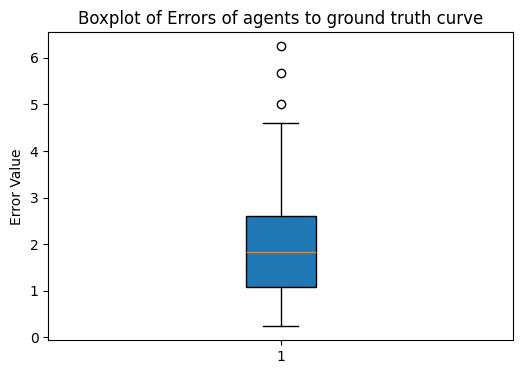

[1.623764   2.1347106  3.872293   1.8931557  0.8966279  2.2813082
 1.9933147  0.930838   1.892244   0.8634575  2.0606952  1.3273153
 0.9381227  1.880538   1.1074843  1.5765456  3.257284   0.63842297
 0.89350605 0.83406025 1.545197   0.45904535 0.45904535 2.1517506
 2.6972973  1.0760052  1.0780864  2.8242533  3.223853   1.342405
 3.4746437  3.2920146  2.1540923  1.5461074  1.0423152  2.2801375
 1.1587336  1.4079626  3.238419   2.6067615  0.7705812  2.3518088
 1.4040614  1.9477867  0.24194491 4.6336355  5.7236896  6.3040967
 1.6510803  2.8018806  1.8021009  1.1515808  5.054702   1.6502998
 1.637422   0.63842297 3.5569835  2.4190612  1.9066836  2.849099  ]


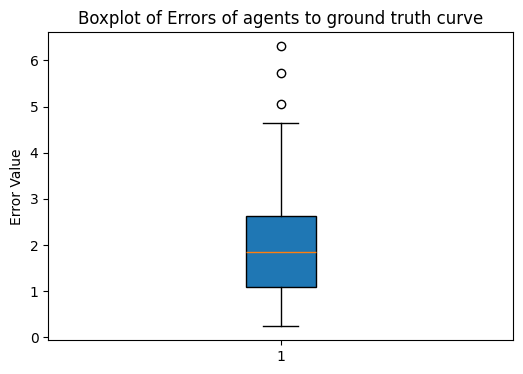

[2.4380865  3.2052746  5.8142595  2.842579   1.3462895  3.4253912
 2.992968   1.397656   2.8412101  1.296484   3.09414    1.9929681
 1.408594   2.8236334  1.662891   2.367188   4.8908215  0.95859396
 1.341602   1.252344   2.320118   0.689258   0.689258   3.23086
 4.05       1.615625   1.61875    4.240625   4.840625   2.015625
 5.217188   4.94297    3.234376   2.321485   1.5650395  3.4236336
 1.7398419  2.11406    4.862496   3.91406    1.15703    3.531248
 2.1082025  2.9246075  0.363281   6.9574175  8.594137   9.46562
 2.4791021  4.207032   2.70586    1.729102   7.58965    2.47793
 2.458594   0.95859396 5.3408213  3.6322274  2.862891   4.2779307 ]


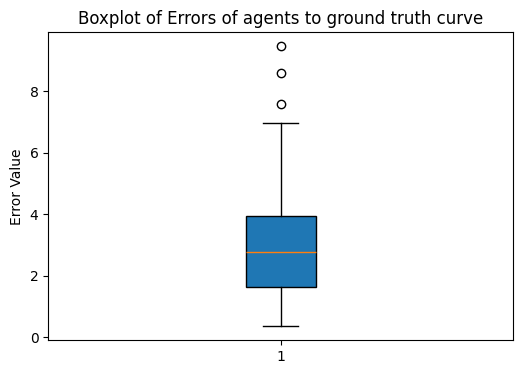

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.06
INFO:Logger:Average Furthest Distance Across Agents: 27.39


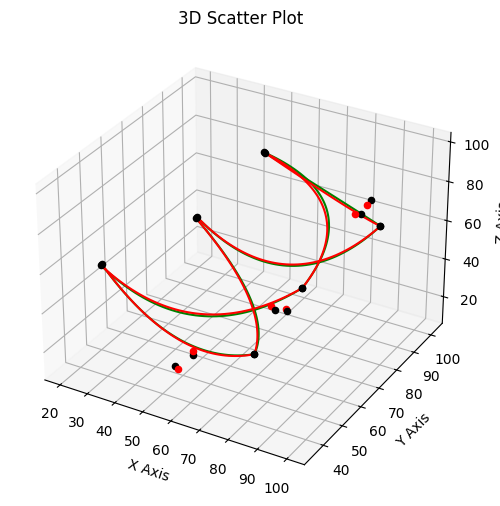

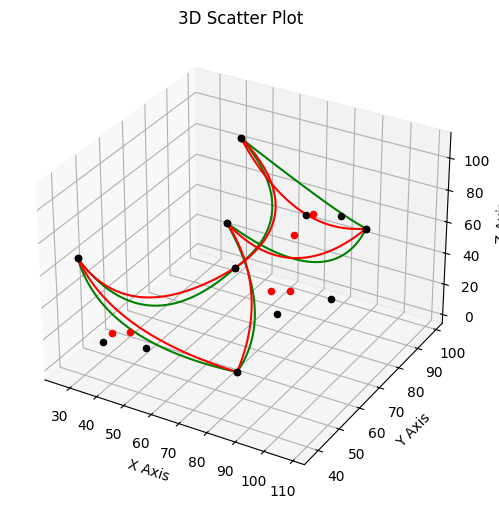

In [14]:
run_training(config)

INFO:Logger:Evaluation Episode 1: Total Reward = 15.53 | Final Average Distance = 7.80 | Error in mm [1.47 3.   0.74 3.12 1.83 2.91] | Closest Point = [ 5.1   3.16  2.24 10.68  6.78 11.66] | Furthest Point = [24.08 19.03 18.22 25.55 25.5  23.62]
INFO:Logger:Evaluation Episode 2: Total Reward = 15.49 | Final Average Distance = 7.26 | Error in mm [1.18 1.93 2.52 2.92 0.78 4.12] | Closest Point = [2.83 3.74 5.39 8.25 2.24 9.27] | Furthest Point = [13.34 25.57 23.43 21.61 25.73 21.93]
INFO:Logger:Evaluation Episode 3: Total Reward = 15.61 | Final Average Distance = 11.46 | Error in mm [2.13 3.93 1.06 4.13 1.87 3.17] | Closest Point = [ 7.35  5.2   2.83 16.91  7.28 12.41] | Furthest Point = [27.15 22.34 22.58 29.7  25.48 30.68]
INFO:Logger:Evaluation Episode 4: Total Reward = 24.51 | Final Average Distance = 7.37 | Error in mm [2.04 0.99 0.84 3.   1.81 2.06] | Closest Point = [ 9.85  3.61  3.32 11.58  6.48  9.  ] | Furthest Point = [23.43 33.85 32.26 33.56 35.17 28.37]
INFO:Logger:Evaluatio

[ 0.97108006  1.9785082   0.49159804  2.0620306   1.210821    1.917928
  0.7818658   1.274625    1.6655579   1.929531    0.5178927   2.72145
  1.4077717   2.591141    0.69950324  2.7231274   1.2362146   2.0897446
  1.3471905   0.65426123  0.5552713   1.9778641   1.194452    1.362271
  1.3907573   0.619203    1.1166018   4.029718    5.816435    2.669893
  1.410734    0.5586224   0.36064264  0.0989899   0.36064264  1.5485215
  0.40575564  3.0898285   1.491036    1.7941933   1.236859    1.8869957
  1.7807871   0.6063131   1.7673821  10.425905    1.8323443   5.667172
  1.559091    2.0684764   2.3262627   5.81875     1.1662247   1.4394782
  0.8622951   0.6877739   0.36734557  1.9877903   2.011249    0.81537783]


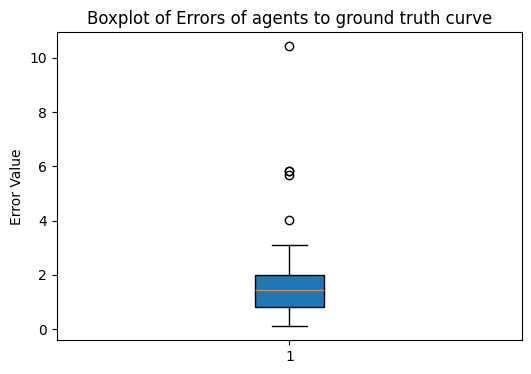

[ 0.98000705  1.9966964   0.49611723  2.0809865   1.221952    1.9355593
  0.7890534   1.2863425   1.6808691   1.9472688   0.52265364  2.746468
  1.4207132   2.614961    0.7059337   2.7481608   1.247579    2.1089551
  1.359575    0.66027576  0.56037587  1.9960463   1.2054325   1.3747941
  1.4035424   0.6248952   1.1268666   4.0667624   5.8699045   2.6944368
  1.4237027   0.5637578   0.36395797  0.0998999   0.36395797  1.5627568
  0.4094857   3.118233    1.504743    1.8106871   1.2482293   1.9043425
  1.7971576   0.6118869   1.7836295  10.521749    1.8491888   5.7192693
  1.5734234   2.0874918   2.3476477   5.872241    1.1769457   1.4527111
  0.87022203  0.6940965   0.37072253  2.006064    2.0297382   0.8228735 ]


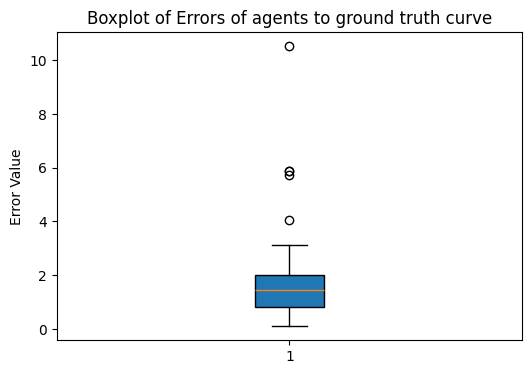

[ 1.4714836  2.9980457  0.7449215  3.1246076  1.8347646  2.906248
  1.184766   1.931447   2.5238302  2.92383    0.784766   4.1238303
  2.1332052  3.9263716  1.0599616  4.126372   1.8732436  3.1666026
  2.0414062  0.991406   0.841406   2.9970696  1.8099606  2.0642576
  2.107423   0.938282   1.6919936  6.106256   8.81368    4.0457053
  2.137694   0.846484   0.546484   0.15       0.546484   2.3464842
  0.614844   4.682036   2.259376   2.7187521  1.87422    2.859376
  2.6984375  0.91875    2.678125  15.798437   2.7765625  8.5875
  2.3625     3.134375   3.525      8.817187   1.7671875  2.18125
  1.306641   1.0421879  0.556641   3.012111   3.047658   1.2355471]


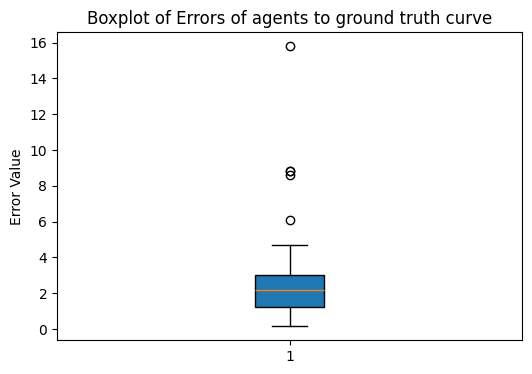

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 5.93
INFO:Logger:Average Furthest Distance Across Agents: 26.95


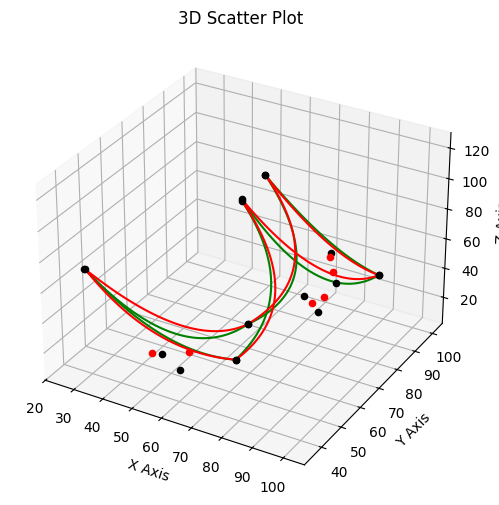

In [19]:
run_test(config)

Experiment 2: Network 3D - share positions

In [ ]:
config.experiment = Experiment.SHARE_POSITIONS

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 3: Network 3D share pairwise positions

In [20]:
config.experiment = Experiment.SHARE_PAIRWISE

INFO:Logger:Episode 1: Total Reward = -23.39 | Final Avg Distance 50.23 | Distances in mm [ 4.61  3.71 14.68 10.96 15.83  2.04] | Avg Closest Point = 10.19 | Avg Furthest Point = 63.32
INFO:Logger:Episode 2: Total Reward = -2.56 | Final Avg Distance 29.40 | Distances in mm [9.12 6.61 2.36 2.32 6.34 5.85] | Avg Closest Point = 7.07 | Avg Furthest Point = 42.02
INFO:Logger:Episode 3: Total Reward = 8.12 | Final Avg Distance 21.54 | Distances in mm [5.87 3.22 3.26 5.25 2.72 4.27] | Avg Closest Point = 10.59 | Avg Furthest Point = 33.51
INFO:Logger:Episode 4: Total Reward = 12.56 | Final Avg Distance 17.10 | Distances in mm [7.65 2.78 1.12 1.13 2.09 3.05] | Avg Closest Point = 6.91 | Avg Furthest Point = 33.55
INFO:Logger:Episode 5: Total Reward = 11.48 | Final Avg Distance 16.54 | Distances in mm [3.03 4.38 4.31 1.61 2.47 1.52] | Avg Closest Point = 6.42 | Avg Furthest Point = 32.54
INFO:Logger:Episode 6: Total Reward = 7.13 | Final Avg Distance 20.90 | Distances in mm [3.62 5.04 3.66 4.8

[2.6540384  0.5501159  1.5951813  2.129057   2.4536097  1.3533779
 1.8447177  2.4666264  1.4169216  0.85559213 2.5333931  3.2600925
 1.6611745  1.9322369  1.2265469  4.325009   2.7628243  2.2334602
 0.5279461  0.87518424 1.6042039  0.90972775 3.1353254  4.6744375
 2.9305134  4.0070286  3.190362   3.340909   1.6003367  2.9387627
 1.127557   3.9507031  2.0571342  0.9984062  1.2652149  2.3541038
 0.6372468  2.4226723  1.9117404  2.043727   2.594359   4.3003836
 1.7980576  2.7340794  2.1819012  6.8217926  4.8554     7.721466
 5.99469    2.776358   3.1746378  6.792023   4.7109146  5.2549725
 3.0427797  1.5277702  3.8861277  3.7998984  2.1990457  3.4515    ]


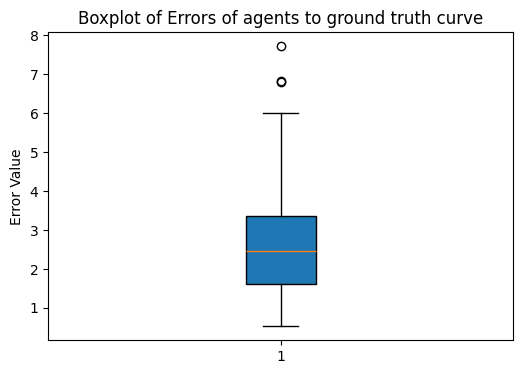

[2.6784365  0.55517304 1.6098456  2.148629   2.4761655  1.3658195
 1.861676   2.4893017  1.4299473  0.8634575  2.5566823  3.290062
 1.6764455  1.9499997  1.2378224  4.364768   2.7882226  2.253992
 0.5327995  0.8832297  1.6189511  0.9180907  3.164148   4.717409
 2.9574533  4.0438647  3.2196906  3.3716216  1.6150484  2.9657784
 1.1379225  3.9870214  2.076045   1.0075843  1.2768459  2.3757448
 0.6431049  2.4449434  1.9293149  2.0625148  2.6182086  4.3399167
 1.8145869  2.7592132  2.2019591  6.8845043  4.9000354  7.7924485
 6.049798   2.8018806  3.2038217  6.854461   4.7542214  5.303281
 3.0707514  1.5418148  3.9218524  3.8348305  2.2192612  3.4832292 ]


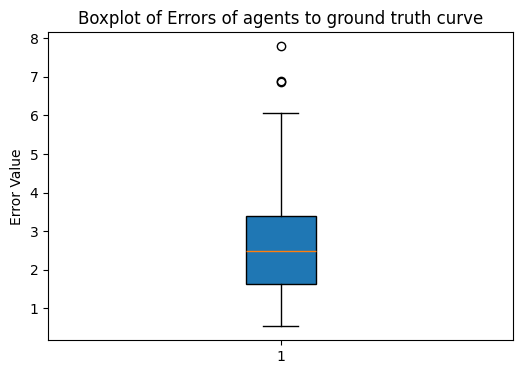

[ 4.0216804   0.83359396  2.417188    3.226173    3.71797     2.050782
  2.795312    3.737694    2.14707     1.296484    3.838866    4.940038
  2.517188    2.9279304   1.8585941   6.5537124   4.1865244   3.384376
  0.8         1.326172    2.43086     1.378516    4.750978    7.0832043
  4.440625    6.071875    4.834375    5.0625      2.425       4.453125
  1.7085941   5.9865246   3.117188    1.512891    1.9171879   3.567188
  0.965624    3.67109     2.896872    3.0968719   3.931248    6.516398
  2.7246075   4.142967    3.3062482  10.337104    7.3574176  11.700385
  9.08379     4.207032    4.810548   10.291994    7.138478    7.962892
  4.6107426   2.3150396   5.888673    5.7580094   3.3322275   5.230079  ]


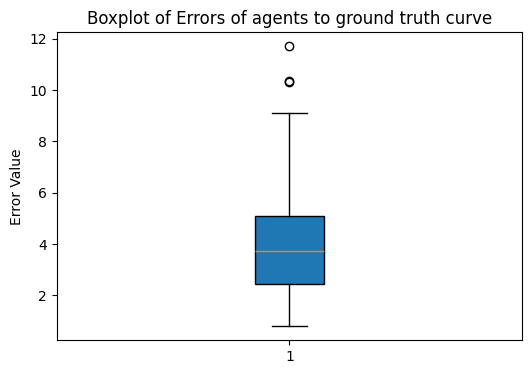

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.22
INFO:Logger:Average Furthest Distance Across Agents: 28.93
INFO:Logger:Episode 11: Total Reward = 17.28 | Final Avg Distance 8.46 | Distances in mm [0.82 0.63 0.41 3.06 1.67 1.24] | Avg Closest Point = 1.38 | Avg Furthest Point = 27.31
INFO:Logger:Episode 12: Total Reward = 24.22 | Final Avg Distance 1.52 | Distances in mm [0.   0.42 0.21 0.21 0.21 0.41] | Avg Closest Point = 0.00 | Avg Furthest Point = 27.53
INFO:Logger:Episode 13: Total Reward = 22.95 | Final Avg Distance 5.80 | Distances in mm [1.06 0.27 1.85 0.99 1.06 3.14] | Avg Closest Point = 3.57 | Avg Furthest Point = 30.46
INFO:Logger:Episode 14: Total Reward = 18.63 | Final Avg Distance 10.12 | Distances in mm [1.46 1.04 1.16 2.1  3.55 4.37] | Avg Closest Point = 0.67 | Avg Furthest Point = 29.39
INFO:Logger:Episode 15: Total Reward = 16.01 | Final Avg Distance 7.45 | Distances in mm [1.18 0.97 2.51 1.2  1.82 1.06] | Avg Clos

[1.6365561  1.6503477  1.4523679  2.129057   0.6628974  2.4860904
 3.1614892  2.105597   0.62500244 2.1723638  1.9751574  4.385845
 2.117456   1.8978225  1.4330338  1.8978225  4.226019   2.5950053
 1.6772861  1.2569658  1.5554824  0.5035854  1.14934    2.3474016
 2.6521044  1.3343014  2.3963804  1.9921718  3.4481483  3.7286196
 2.0830414  3.3567636  2.6336734  2.1947923  0.73159736 2.3281965
 1.165193   1.1595215  0.13198653 2.6000304  1.5611526  4.1271544
 2.1710749  2.637151   1.2350531  3.9085522  5.6715517  1.9313339
 2.1302164  2.776358   4.958003   2.3305166  3.966557   6.001651
 2.0528805  2.5261765  1.9666514  4.1529365  1.72575    3.5462363 ]


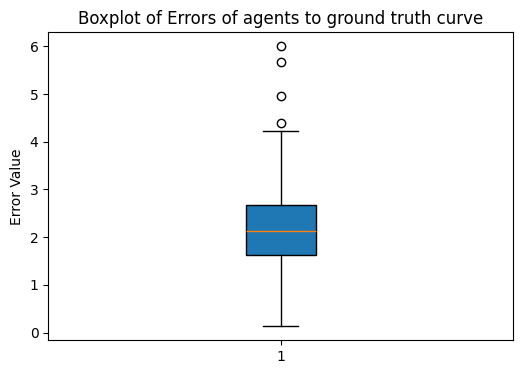

[1.6516007  1.6655191  1.4657193  2.148629   0.6689913  2.5089447
 3.1905525  2.1249535  0.630748   2.192334   1.9933147  4.4261637
 2.1369214  1.9152689  1.4462075  1.9152689  4.2648683  2.618861
 1.6927053  1.268521   1.5697817  0.5082148  1.1599058  2.368981
 2.6764848  1.3465674  2.41841    2.0104854  3.4798465  3.7628963
 2.1021907  3.3876219  2.6578844  2.2149687  0.73832285 2.3495994
 1.1759044  1.1701808  0.13319987 2.6239321  1.5755041  4.1650944
 2.1910334  2.6613941  1.2464068  3.944483   5.7236896  1.9490883
 2.1497993  2.8018806  5.003581   2.3519406  4.003021   6.0568233
 2.0717525  2.5493991  1.9847306  4.191114   1.7416146  3.5788364 ]


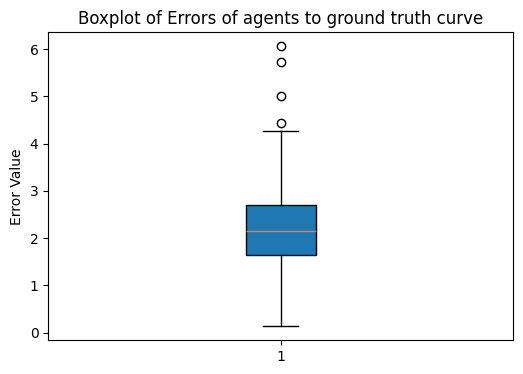

[2.4798834 2.500782  2.200782  3.226173  1.0044925 3.767188  4.790624
 3.190624  0.94707   3.291796  2.992968  6.645898  3.208594  2.875782
 2.171485  2.875782  6.4037123 3.9322276 2.541602  1.904688  2.357032
 0.763086  1.741602  3.557032  4.01875   2.021875  3.63125   3.01875
 5.225     5.65      3.1564455 5.0865245 3.9908214 3.325782  1.108594
 3.5279305 1.765624  1.75703   0.2       3.939842  2.365624  6.253902
 3.289843  3.9960911 1.8714836 5.922653  8.594137  2.926562  3.22793
 4.207032  7.5128922 3.531446  6.010548  9.094338  3.1107426 3.8279305
 2.980079  6.29297   2.6150396 5.3736334]


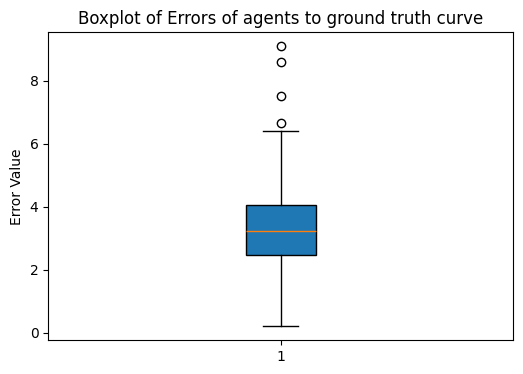

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.66
INFO:Logger:Average Furthest Distance Across Agents: 27.50
INFO:Logger:Episode 21: Total Reward = 24.87 | Final Avg Distance 3.18 | Distances in mm [0.74 0.47 0.34 0.37 0.73 0.34] | Avg Closest Point = 0.50 | Avg Furthest Point = 28.89
INFO:Logger:Episode 22: Total Reward = 26.38 | Final Avg Distance 1.67 | Distances in mm [0.34 0.24 0.1  0.34 0.24 0.34] | Avg Closest Point = 0.00 | Avg Furthest Point = 31.07
INFO:Logger:Episode 23: Total Reward = 20.07 | Final Avg Distance 5.07 | Distances in mm [0.39 0.92 2.23 1.05 0.52 0.66] | Avg Closest Point = 1.69 | Avg Furthest Point = 27.31
INFO:Logger:Episode 24: Total Reward = 23.71 | Final Avg Distance 1.43 | Distances in mm [0.13 0.39 0.13 0.52 0.26 0.13] | Avg Closest Point = 0.24 | Avg Furthest Point = 26.01
INFO:Logger:Episode 25: Total Reward = 16.67 | Final Avg Distance 7.13 | Distances in mm [1.04 0.58 0.74 3.54 1.84 0.2 ] | Avg Close

[2.1339543 1.8483275 0.9736587 1.9034939 1.3120033 2.2605274 1.2833883
 1.8750073 1.3167716 1.3167716 3.7197251 1.0543454 1.127557  2.293782
 1.3642049 1.4933558 2.2980356 1.0285671 1.1249793 1.066075  1.1249793
 1.7950947 1.6285646 2.0387022 0.8042929 1.8746213 2.408754  4.6628366
 3.2006733 1.8498738 2.5822446 3.2276127 1.5320238 3.5547435 1.0672351
 1.8978225 1.3951372 1.6761247 1.1368356 2.3530717 2.3077    1.0218635
 1.1272986 2.169785  2.673499  1.9906242 3.6566951 2.8539498 3.7140548
 2.776358  1.685922  1.3390707 4.413172  2.4801617 1.6913354 2.2334602
 2.6982489 3.0253794 1.794579  1.5579311]


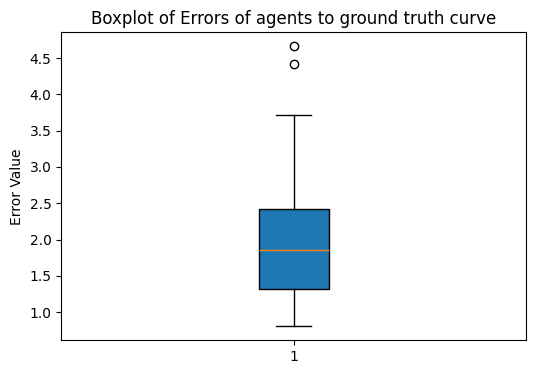

[2.1535716  1.8653189  0.98260945 1.9209925  1.3240643  2.2813082
 1.2951863  1.892244   1.3288765  1.3288765  3.7539198  1.0640378
 1.1379225  2.3148685  1.3767458  1.5070839  2.3191612  1.0380225
 1.135321   1.0758753  1.135321   1.8115968  1.6435359  2.0574439
 0.8116867  1.8918544  2.4308975  4.7057014  3.2300968  1.8668795
 2.6059828  3.257284   1.5461074  3.5874217  1.0770462  1.9152689
 1.4079626  1.6915331  1.1472864  2.3747032  2.3289144  1.0312574
 1.1376617  2.1897316  2.6980762  2.0089238  3.6903107  2.8801858
 3.7481978  2.8018806  1.7014205  1.3513806  4.4537416  2.5029614
 1.7068837  2.253992   2.7230535  3.0531914  1.8110763  1.572253  ]


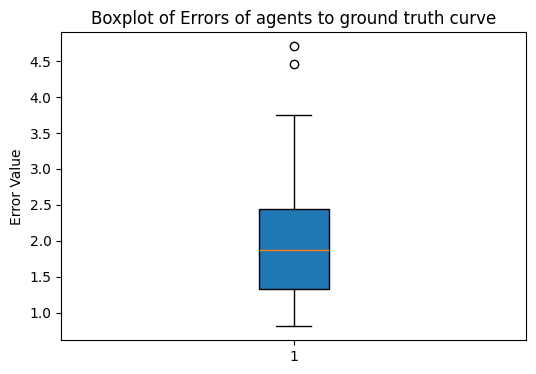

[3.2335942 2.800782  1.475391  2.884376  1.9880865 3.4253912 1.944726
 2.8412101 1.995312  1.995312  5.6365223 1.597656  1.7085941 3.475782
 2.067188  2.262891  3.4822276 1.558594  1.704688  1.61543   1.704688
 2.720118  2.467774  3.089258  1.21875   2.840625  3.65      7.065625
 4.85      2.8031251 3.9128911 4.8908215 2.321485  5.3865247 1.617188
 2.875782  2.11406   2.539842  1.722654  3.565624  3.496872  1.5484359
 1.7082026 3.2878885 4.0511694 3.016405  5.541013  4.324608  5.62793
 4.207032  2.554688  2.029102  6.687306  3.758204  2.562891  3.384376
 4.088673  4.584376  2.7193365 2.3607426]


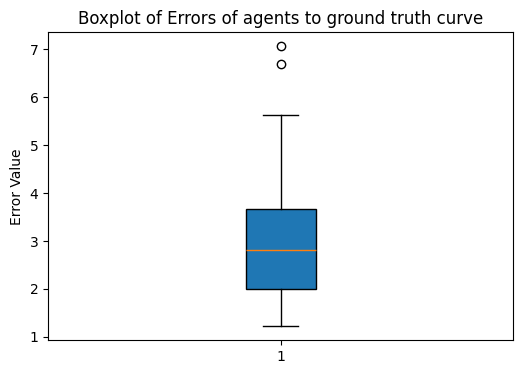

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 10.52
INFO:Logger:Average Furthest Distance Across Agents: 27.92
INFO:Logger:Episode 31: Total Reward = 22.66 | Final Avg Distance 5.36 | Distances in mm [1.12 1.05 0.66 0.99 0.53 0.99] | Avg Closest Point = 1.31 | Avg Furthest Point = 29.65
INFO:Logger:Episode 32: Total Reward = 25.76 | Final Avg Distance 2.26 | Distances in mm [0.23 0.39 0.23 0.59 0.49 0.1 ] | Avg Closest Point = 0.71 | Avg Furthest Point = 29.70
INFO:Logger:Episode 33: Total Reward = 24.28 | Final Avg Distance 5.73 | Distances in mm [1.35 0.84 1.19 0.88 1.   1.26] | Avg Closest Point = 2.22 | Avg Furthest Point = 32.61
INFO:Logger:Episode 34: Total Reward = 28.08 | Final Avg Distance 1.93 | Distances in mm [0.38 0.13 0.48 0.48 0.45 0.13] | Avg Closest Point = 0.33 | Avg Furthest Point = 32.11
INFO:Logger:Episode 35: Total Reward = 18.65 | Final Avg Distance 2.97 | Distances in mm [0.66 0.4  1.19 0.4  0.66 0.  ] | Avg Close

[1.2405965  4.155127   0.9460755  6.9997993  3.4435089  1.6390048
 2.4363368  0.85559213 2.0753074  5.0364966  3.783398   1.5155249
 1.5235167  1.8978225  2.1302168  4.9274554  3.098462   0.83058727
 1.3889524  0.13198653 1.8925377  3.8541625  2.4408493  3.3789332
 2.406692   3.204798   2.9284513  4.409175   4.015278   1.5982745
 3.2794275  3.4944217  2.5219228  4.1916046  2.9263895  1.3986194
 1.1425071  0.8955484  2.1870565  4.553014   3.8234808  1.2801651
 2.662673   4.533427   2.876892   2.421642   4.220989   6.246672
 1.9836652  5.2549725  2.1831918  5.0569925  8.378955   1.0912092
 2.8188925  1.1318105  2.362611   3.4642608  5.383737   1.6267601 ]


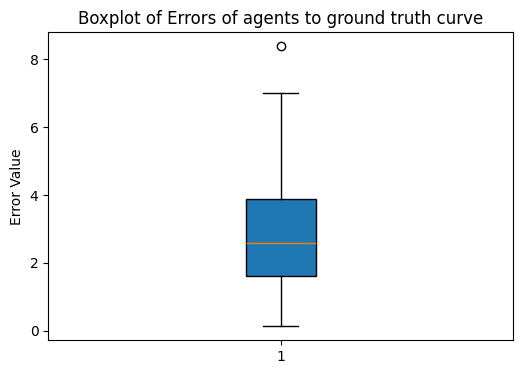

[1.2520012  4.1933246  0.95477265 7.0641475  3.4751647  1.6540719
 2.4587338  0.8634575  2.0943854  5.0827966  3.8181782  1.5294569
 1.5375221  1.9152689  2.1497996  4.972753   3.1269457  0.83822274
 1.4017208  0.13319987 1.9099356  3.8895934  2.4632878  3.409995
 2.4288163  3.2342594  2.955372   4.449708   4.05219    1.6129671
 3.3095748  3.5265453  2.5451064  4.2301373  2.9532914  1.4114767
 1.15301    0.90378106 2.2071617  4.594869   3.8586297  1.2919334
 2.6871505  4.575102   2.903339   2.443904   4.2597923  6.3040967
 2.0019007  5.303281   2.2032616  5.103481   8.455982   1.1012405
 2.8448062  1.1422151  2.3843303  3.496107   5.433229   1.6417147 ]


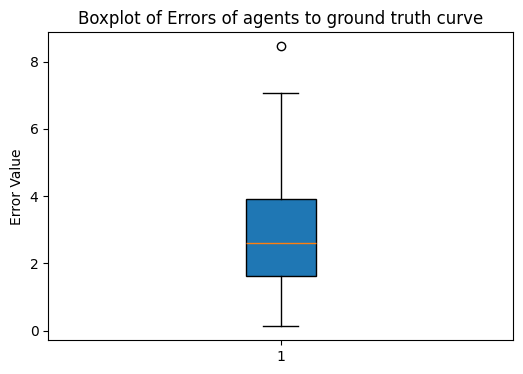

[ 1.8798835  6.2962894  1.433594  10.606838   5.21797    2.483594
  3.691796   1.296484   3.144726   7.631834   5.733006   2.296484
  2.308594   2.875782   3.2279305  7.4666033  4.6951184  1.258594
  2.104688   0.2        2.867774   5.8402357  3.698634   5.120118
  3.646875   4.85625    4.4375     6.68125    6.084375   2.421875
  4.9693365  5.2951183  3.821485   6.351564   4.434376   2.1193366
  1.731248   1.35703    3.31406    6.89921    5.793744   1.939842
  4.034765   6.8695292  4.359372   3.6695292  6.396091   9.46562
  3.00586    7.962892   3.308204   7.662892  12.696682   1.653516
  4.271485   1.7150395  3.580079   5.2494154  8.15801    2.4650395]


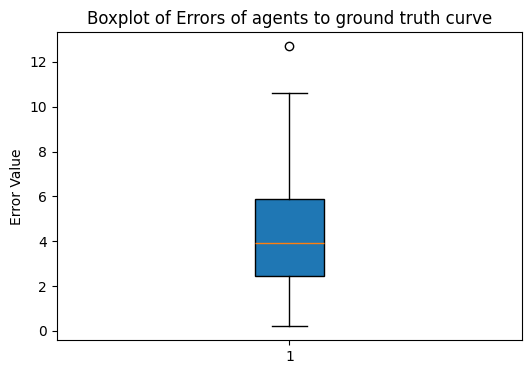

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.69
INFO:Logger:Average Furthest Distance Across Agents: 27.65


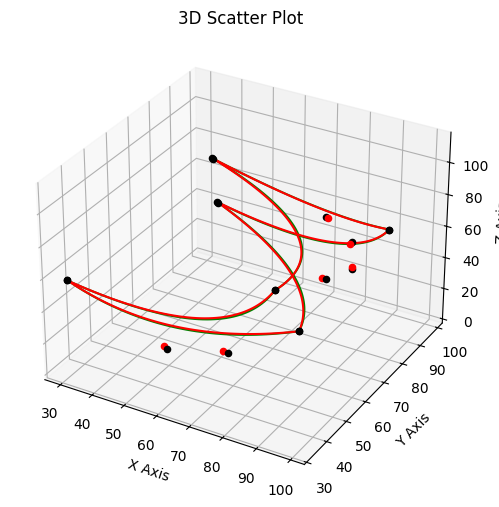

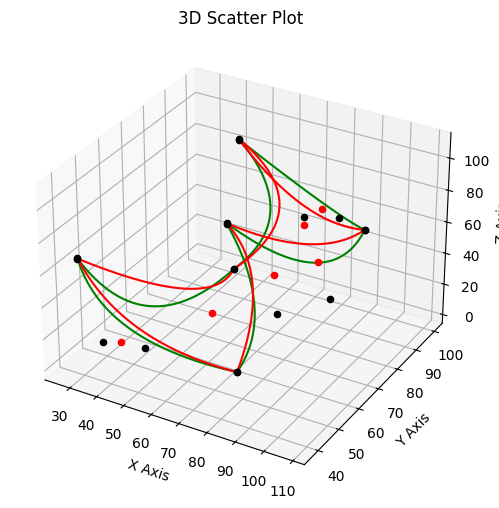

In [21]:
run_training(config)

INFO:Logger:Evaluation Episode 1: Total Reward = 13.99 | Final Average Distance = 9.34 | Error in mm [2.27 1.54 3.31 1.29 3.03 2.91] | Closest Point = [ 5.    3.16 11.18  5.2   8.77 11.18] | Furthest Point = [24.08 19.03 17.83 25.32 25.5  23.62]
INFO:Logger:Evaluation Episode 2: Total Reward = 13.18 | Final Average Distance = 9.58 | Error in mm [0.4  1.58 4.07 5.26 2.72 3.34] | Closest Point = [ 0.    5.48 11.18 15.52  5.83  9.11] | Furthest Point = [13.34 25.57 23.43 21.61 25.73 21.93]
INFO:Logger:Evaluation Episode 3: Total Reward = 5.78 | Final Average Distance = 21.30 | Error in mm [4.39 7.95 9.97 5.68 4.42 2.75] | Closest Point = [14.56 10.34 20.25 17.89 10.   10.82] | Furthest Point = [27.15 30.64 33.79 29.53 25.48 30.68]
INFO:Logger:Evaluation Episode 4: Total Reward = 21.01 | Final Average Distance = 10.87 | Error in mm [0.77 2.07 1.19 5.07 2.39 3.36] | Closest Point = [ 4.   11.    5.2  20.62  9.22 12.65] | Furthest Point = [23.43 33.85 31.92 33.62 35.17 28.37]
INFO:Logger:Eva

[1.4990262  1.0195441  2.1819012  0.8512095  2.0027401  1.917928
 0.26397306 1.0408121  2.6862633  3.4731557  1.7925177  2.2035575
 2.8991942  5.2441463  6.5770326  3.7482145  2.9167247  1.8124965
 0.51003    1.3688443  0.78341204 3.3467083  1.5753312  2.214512
 1.4416695  1.624183   7.207577   5.8266172  3.4919744  3.1571093
 2.4324696  1.4072536  1.0819279  0.5904589  0.6222954  2.7931123
 0.9630899  2.747487   1.8333775  7.0153985  5.470744   1.3688456
 0.96205807 3.375968   2.899579   4.6535563  0.83007157 4.7319236
 0.5217593  1.8354378  2.6057029  3.4863005  4.0204334  0.39286616
 0.7112325  0.6643153  2.1857703  3.8531322  1.5683721  0.73469114]


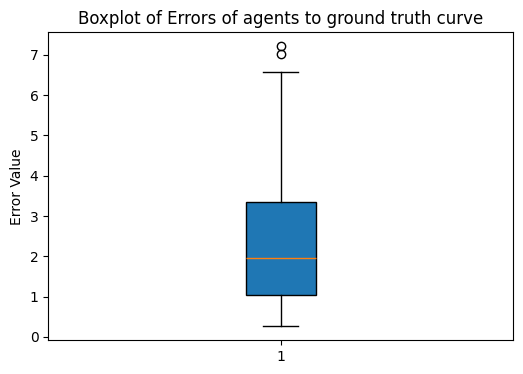

[1.5128065  1.0289167  2.2019591  0.8590346  2.021151   1.9355593
 0.26639974 1.0503802  2.7109578  3.505084   1.8089961  2.2238145
 2.925846   5.292355   6.6374946  3.7826712  2.9435377  1.8291585
 0.5147186  1.3814279  0.79061383 3.377474   1.589813   2.2348697
 1.4549226  1.639114   7.2738357  5.8801804  3.5240757  3.1861322
 2.454831   1.4201902  1.0918739  0.5958869  0.62801605 2.818789
 0.97194344 2.7727444  1.8502314  7.0798903  5.521036   1.3814292
 0.97090214 3.407003   2.9262345  4.696336   0.8377023  4.7754235
 0.5265557  1.8523107  2.6296568  3.5183496  4.0573926  0.39647773
 0.71777076 0.67042226 2.2058637  3.8885536  1.58279    0.74144506]


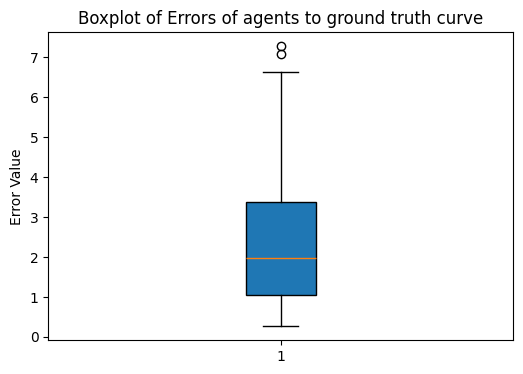

[ 2.2714837  1.5449215  3.3062482  1.2898431  3.0347645  2.906248
  0.4        1.577149   4.0705113  5.262894   2.716213   3.3390641
  4.3931665  7.946487   9.966218   5.6796923  4.4197307  2.7464871
  0.7728515  2.074218   1.187109   5.0712876  2.387109   3.3556635
  2.1845706  2.4611347 10.921686   8.829109   5.29141    4.783987
  3.685936   2.13242    1.639452   0.894726   0.942968   4.23242
  1.459376   4.1632843  2.7781281 10.630476   8.289852   2.07422
  1.4578125  5.115625   4.39375    7.0515623  1.2578125  7.1703124
  0.790625   2.78125    3.9484375  5.2828126  6.0921874  0.5953125
  1.077735   1.006641   3.312111   5.838675   2.376564   1.113282 ]


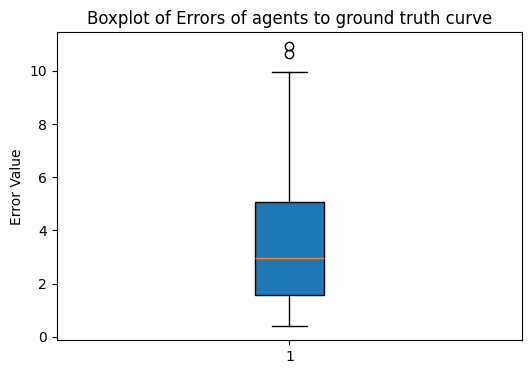

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 7.98
INFO:Logger:Average Furthest Distance Across Agents: 26.95


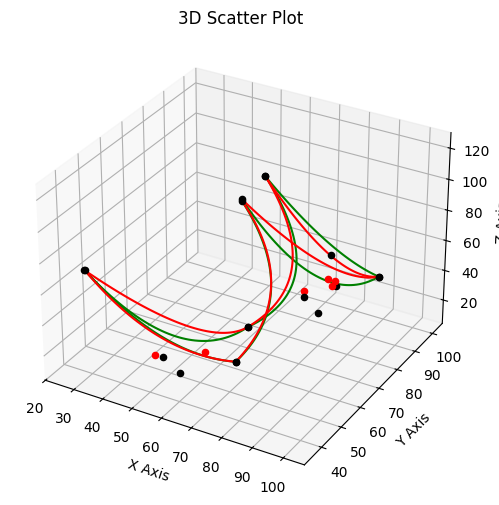

In [22]:
run_test(config)

Experiment 4: CommNet - work alone

In [ ]:
config.experiment = Experiment.WORK_ALONE
config.model_type = "CommNet"

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 5: CommNet - share positions

In [ ]:
config.experiment = Experiment.SHARE_POSITIONS

In [ ]:
run_training(config)

In [ ]:
run_test(config)

Experiment 6: CommNet - share pairwise

In [23]:
config.experiment = Experiment.SHARE_PAIRWISE

INFO:Logger:Episode 1: Total Reward = -4.06 | Final Avg Distance 28.59 | Distances in mm [ 3.22  4.54 10.8   6.1   6.62  3.64] | Avg Closest Point = 9.63 | Avg Furthest Point = 38.81
INFO:Logger:Episode 2: Total Reward = 1.75 | Final Avg Distance 22.78 | Distances in mm [4.01 1.59 9.05 5.81 3.82 4.81] | Avg Closest Point = 7.19 | Avg Furthest Point = 35.10
INFO:Logger:Episode 3: Total Reward = -16.67 | Final Avg Distance 38.29 | Distances in mm [ 2.52  7.56 13.89 10.85  4.64  4.77] | Avg Closest Point = 5.72 | Avg Furthest Point = 43.06
INFO:Logger:Episode 4: Total Reward = 7.06 | Final Avg Distance 14.56 | Distances in mm [1.19 1.19 4.63 1.99 3.85 2.64] | Avg Closest Point = 4.09 | Avg Furthest Point = 27.20
INFO:Logger:Episode 5: Total Reward = 14.10 | Final Avg Distance 8.31 | Distances in mm [0.77 0.61 2.03 3.78 1.36 0.12] | Avg Closest Point = 2.29 | Avg Furthest Point = 25.69
INFO:Logger:Episode 6: Total Reward = 16.97 | Final Avg Distance 5.44 | Distances in mm [0.49 0.36 1.08 2

[3.3031442  1.5262233  6.5762563  2.5525997  1.735546   3.8808432
 2.7336931  2.3058972  1.9083906  0.8222088  2.8975163  2.2740607
 2.6939952  2.001066   7.3117204  3.9549565  2.5304298  5.9861836
 2.2052324  1.8783597  3.1596863  1.246783   4.000327   3.1880424
 2.1200337  3.4625843  1.872559   5.7372894  2.920202   2.6582913
 4.2175117  4.1916046  1.4631947  3.6664941  0.73159736 2.43144
 3.450207   1.1368356  1.9117404  4.351427   0.7805763  3.3862782
 1.3912717  2.4701061  2.4701061  2.218249   2.9738202  2.6505568
 1.835567   7.633824   1.7358037  3.371844   2.821599   2.6282597
 3.0512867  4.4197454  5.6420383  1.1921324  2.362611   4.209005  ]


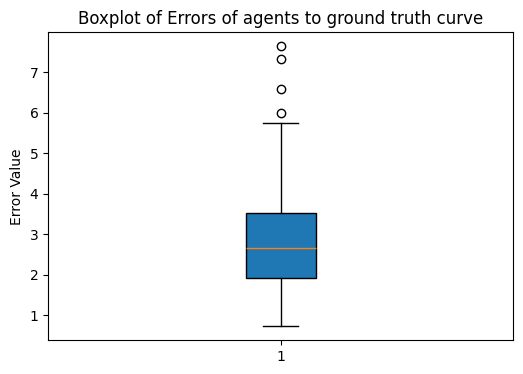

[3.3335094  1.5402538  6.636711   2.5760653  1.7515006  3.9165194
 2.7588236  2.327095   1.9259342  0.8297672  2.9241526  2.2949657
 2.7187607  2.0194614  7.378936   3.991314   2.5536919  6.0412135
 2.2255046  1.8956273  3.1887329  1.2582446  4.0371013  3.2173495
 2.1395228  3.4944153  1.8897731  5.790032   2.947047   2.6827285
 4.256283   4.2301373  1.4766457  3.7001996  0.73832285 2.4537919
 3.4819243  1.1472864  1.9293149  4.391429   0.78775203 3.4174078
 1.4040614  2.4928136  2.4928136  2.2386413  3.0011582  2.6749232
 1.8524412  7.7040005  1.7517607  3.402841   2.8475375  2.652421
 3.079337   4.4603753  5.693905   1.2030915  2.3843303  4.2476974 ]


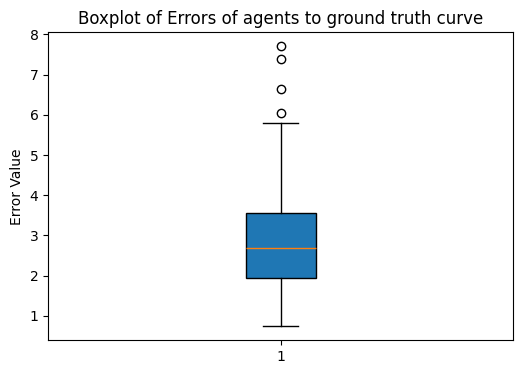

[ 5.005275   2.3126955  9.965041   3.86797    2.6298835  5.8806653
  4.142382   3.4941401  2.891796   1.245898   4.390624   3.445898
  4.0822277  3.0322275 11.079494   5.99297    3.8343759  9.070901
  3.341602   2.8462899  4.787892   1.889258   6.06172    4.83086
  3.2125     5.246875   2.8375     8.69375    4.425      4.028125
  6.3908215  6.351564   2.217188   5.555861   1.108594   3.684376
  5.22812    1.722654   2.896872   6.593744   1.182812   5.131248
  2.1082025  3.7429671  3.7429671  3.3613267  4.506248   4.016405
  2.781446  11.56758    2.630274   5.109376   4.275586   3.982618
  4.6236334  6.697267   8.549416   1.8064456  3.580079   6.3779306]


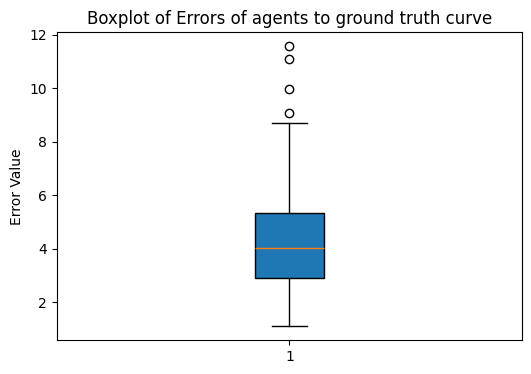

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 14.84
INFO:Logger:Average Furthest Distance Across Agents: 29.54
INFO:Logger:Episode 11: Total Reward = 24.54 | Final Avg Distance 3.51 | Distances in mm [0.32 1.18 0.61 0.32 0.37 0.59] | Avg Closest Point = 1.69 | Avg Furthest Point = 30.02
INFO:Logger:Episode 12: Total Reward = 26.20 | Final Avg Distance 1.84 | Distances in mm [0.34 0.22 0.12 0.32 0.47 0.37] | Avg Closest Point = 0.17 | Avg Furthest Point = 30.67
INFO:Logger:Episode 13: Total Reward = 19.89 | Final Avg Distance 4.64 | Distances in mm [1.01 1.25 0.56 0.41 1.14 1.54] | Avg Closest Point = 1.22 | Avg Furthest Point = 26.60
INFO:Logger:Episode 14: Total Reward = 22.89 | Final Avg Distance 1.64 | Distances in mm [0.15 0.42 0.57 0.13 0.28 0.42] | Avg Closest Point = 0.17 | Avg Furthest Point = 26.45
INFO:Logger:Episode 15: Total Reward = 21.99 | Final Avg Distance 4.85 | Distances in mm [2.17 1.   0.37 0.5  0.37 1.02] | Avg Close

[1.4523679  0.7480957  1.0012419  2.7643712  0.8884604  1.8645679
 0.62500244 2.1086907  1.9448677  2.5000098  2.60016    1.348608
 1.3599513  2.2334602  1.2006396  2.0269732  2.9952185  2.5864983
 0.64575464 1.9027205  0.7188369  1.7463732  2.5382924  2.8753476
 2.400505   2.4046297  2.9284513  5.2093434  3.4522727  1.3343014
 3.3741639  2.8660676  1.2652149  4.3292623  1.2652149  0.598193
 1.6761247  1.4008087  1.9230833  3.5651793  2.319043   1.0332065
 1.6310127  2.421642   2.6492672  1.4626781  3.152981   3.190619
 1.9836652  4.7592497  1.6344936  3.6695871  4.015665   1.5853853
 1.2609614  2.7929852  2.0269732  1.4674484  1.6654282  4.579057  ]


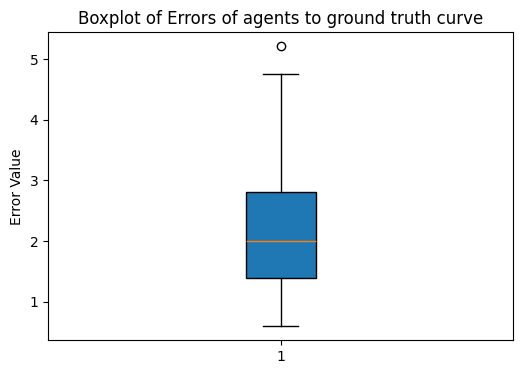

[1.4657193 0.7549729 1.0104462 2.7897837 0.8966279 1.8817085 0.630748
 2.1280756 1.9627467 2.522992  2.6240628 1.3610057 1.3724531 2.253992
 1.2116768 2.0456069 3.0227532 2.6102755 0.651691  1.9202119 0.7254451
 1.7624273 2.5616267 2.9017804 2.4225726 2.4267352 2.955372  5.257232
 3.484009  1.3465674 3.4051821 2.892415  1.2768459 4.369061  1.2768459
 0.6036921 1.6915331 1.4136862 1.940762  3.5979536 2.3403616 1.0427046
 1.6460063 2.443904  2.6736214 1.4761243 3.181966  3.21995   2.0019007
 4.803001  1.6495192 3.7033212 4.052581  1.5999595 1.2725532 2.8186607
 2.0456069 1.4809384 1.6807382 4.6211514]


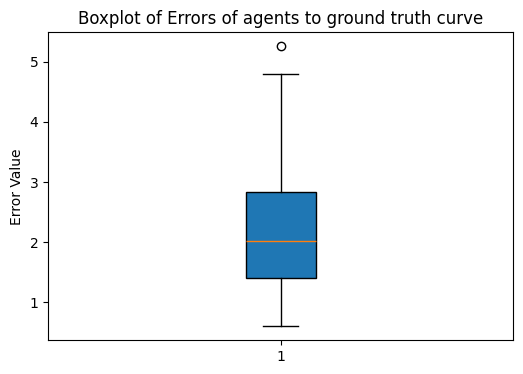

[2.200782  1.133594  1.517188  4.1888685 1.3462895 2.825391  0.94707
 3.195312  2.9470701 3.78828   3.940038  2.043554  2.0607426 3.384376
 1.8193364 3.071485  4.538673  3.9193366 0.978516  2.883204  1.089258
 2.64629   3.8462899 4.357032  3.6375    3.64375   4.4375    7.89375
 5.23125   2.021875  5.112891  4.34297   1.9171879 6.560158  1.9171879
 0.9064455 2.539842  2.122654  2.9140599 5.402338  3.51406   1.565624
 2.4714835 3.6695292 4.0144506 2.2164052 4.7777314 4.8347645 3.00586
 7.21172   2.476758  5.560548  6.084962  2.402344  1.9107425 4.2322273
 3.071485  2.2236335 2.5236335 6.938673 ]


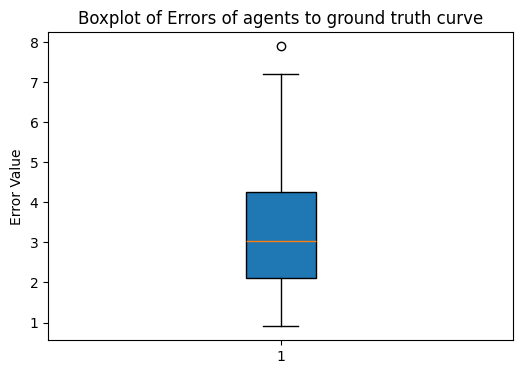

INFO:Logger:===== Evaluation Summary =====
INFO:Logger:Average Closest Distance Across Agents: 11.01
INFO:Logger:Average Furthest Distance Across Agents: 28.65
INFO:Logger:Episode 21: Total Reward = 19.79 | Final Avg Distance 2.62 | Distances in mm [0.24 0.13 0.13 0.84 0.59 0.87] | Avg Closest Point = 0.50 | Avg Furthest Point = 24.01
INFO:Logger:Episode 22: Total Reward = 20.47 | Final Avg Distance 1.94 | Distances in mm [0.24 0.38 0.12 0.12 0.36 0.62] | Avg Closest Point = 0.00 | Avg Furthest Point = 25.00


In [ ]:
run_training(config)

In [ ]:
run_test(config)